In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%run -i common.py
%run -i ln_preamble.py
import laUtilities as ut
from importlib import reload

# Linear Algebra Refresher

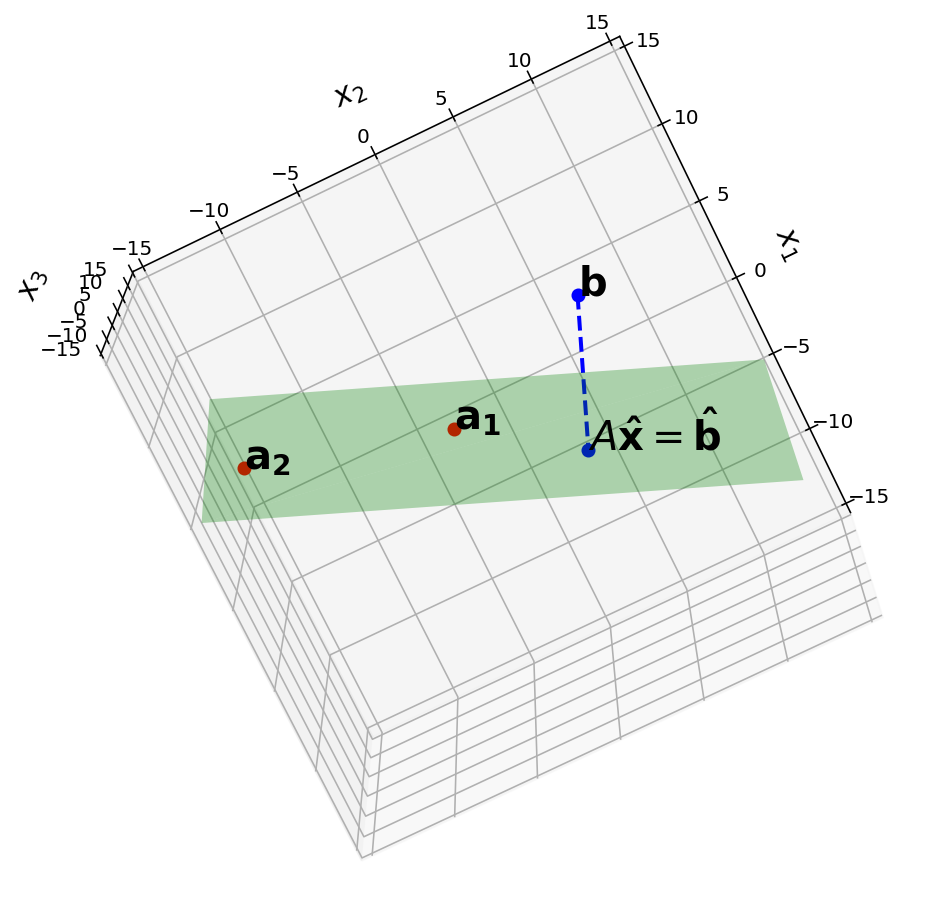

In [2]:
ax = ut.plotSetup3d(-15,15,-15,15,-15,15,(12,8))
a2 = np.array([5.0,-13.0,-3.0])
a1 = np.array([1,-2.0,3])
b = np.array([6.0, 8.0, -5.0])
A = np.array([a1, a2]).T
bhat = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T).dot(b)
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
ax.text(bhat[0],bhat[1],bhat[2],r'$A\mathbf{\hat{x}} = \mathbf{\hat{b}}$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
#ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
ut.plotPoint3d(ax,bhat[0],bhat[1],bhat[2],'b')
ax.plot([b[0],bhat[0]],[b[1],bhat[1]],'b--',zs=[b[2],bhat[2]],lw=2)
#ut.plotPoint3d(ax,0,0,0,'b')
ax.view_init(azim=26.0,elev=-77.0);

This lecture is a review of some aspects of linear algebra that are important for data science.  

Given the prerequisites for this course, I assume that you learned all of this once.  

What I want to do today is bring the material back into your mind fresh.

## Vectors and Matrices

A __matrix__ is a rectangular array of numbers, for example:

$$X = \left[\begin{array}{rrr}
    1  & -2  & 1 \\
    0 & 2 &  - 8 \\
    6 & 5 &9 
\end{array}
\right]$$


A matrix with only one column is called a __column vector__, or simply a __vector__.

Here are some examples.

These are vectors in $\mathbb{R}^2$:
$$
\begin{array}{ccc}
{\bf u} = \left[\begin{array}{r}3\\-1\end{array}\right] &
{\bf v} = \left[\begin{array}{c}.2\\.3\end{array}\right] &
{\bf w} = \left[\begin{array}{c}w_1\\w_2\end{array}\right]
\end{array}
$$


and these are vectors in $\mathbb{R}^3$:

$$
\begin{array}{ccc}
{\bf u} = \left[\begin{array}{c}2\\3\\4\end{array}\right] &
{\bf v} = \left[\begin{array}{r}-1\\0\\2\end{array}\right] &
{\bf w} = \left[\begin{array}{c}w_1\\w_2\\w_3\end{array}\right]
\end{array}
$$

We will use uppercase letters ($X$) for matrices and lowercase __bold__ leters for vectors ($\mathbf{u}$).

A vector like $\left[\begin{array}{c}-2\\-1\end{array}\right]$ (also denoted $(-2,-1)$) can be thought of as a point on the plane.

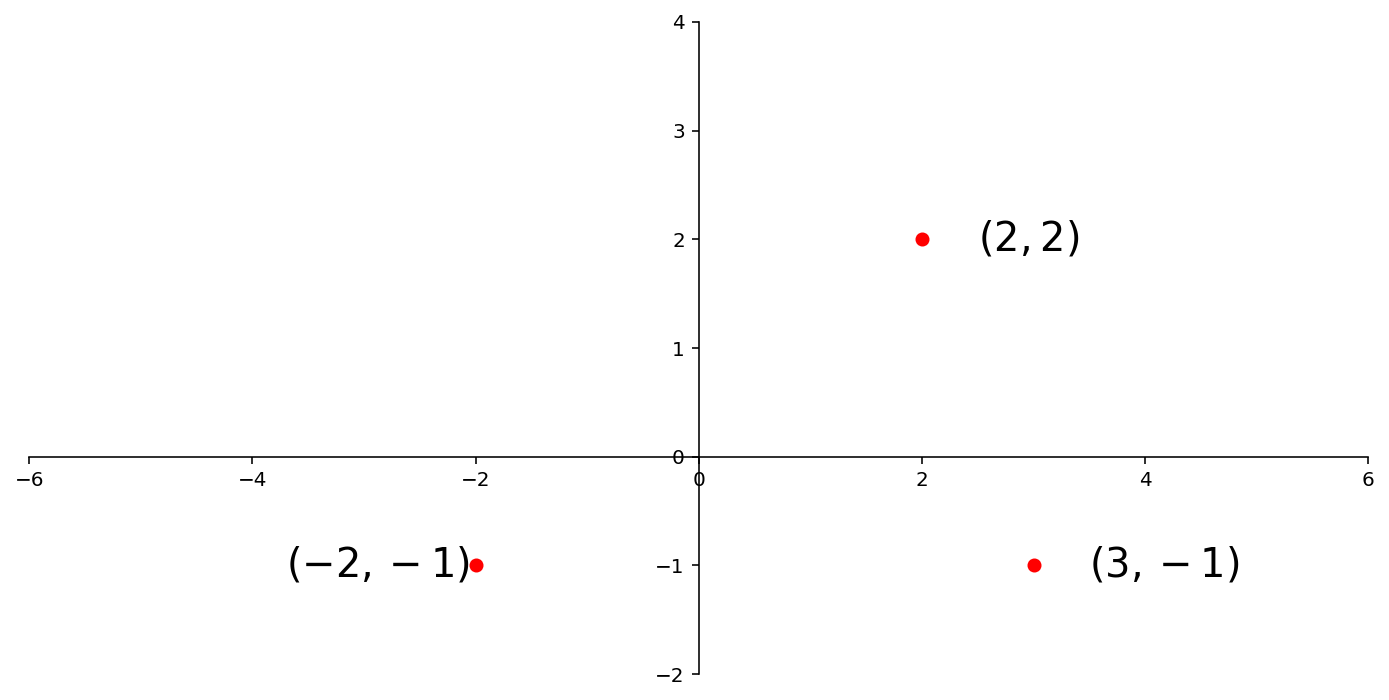

In [3]:
# No need to study this code unless you want to.
ax = ut.plotSetup(size=(12,6))
ut.centerAxes(ax)
ut.plotPoint(ax, -2, -1)
ut.plotPoint(ax, 2, 2)
ut.plotPoint(ax, 3, -1)
ax.plot(0, -2, '')
ax.plot(-4, 0, '')
ax.text(3.5, -1.1, '$(3,-1)$', size=20)
ax.text(2.5, 1.9, '$(2,2)$', size=20)
ax.text(-3.7, -1.1, '$(-2,-1)$', size=20);

Sometimes we draw an arrow from the origin to the point.  This comes from physics, but can be a helpful visualization in any case.

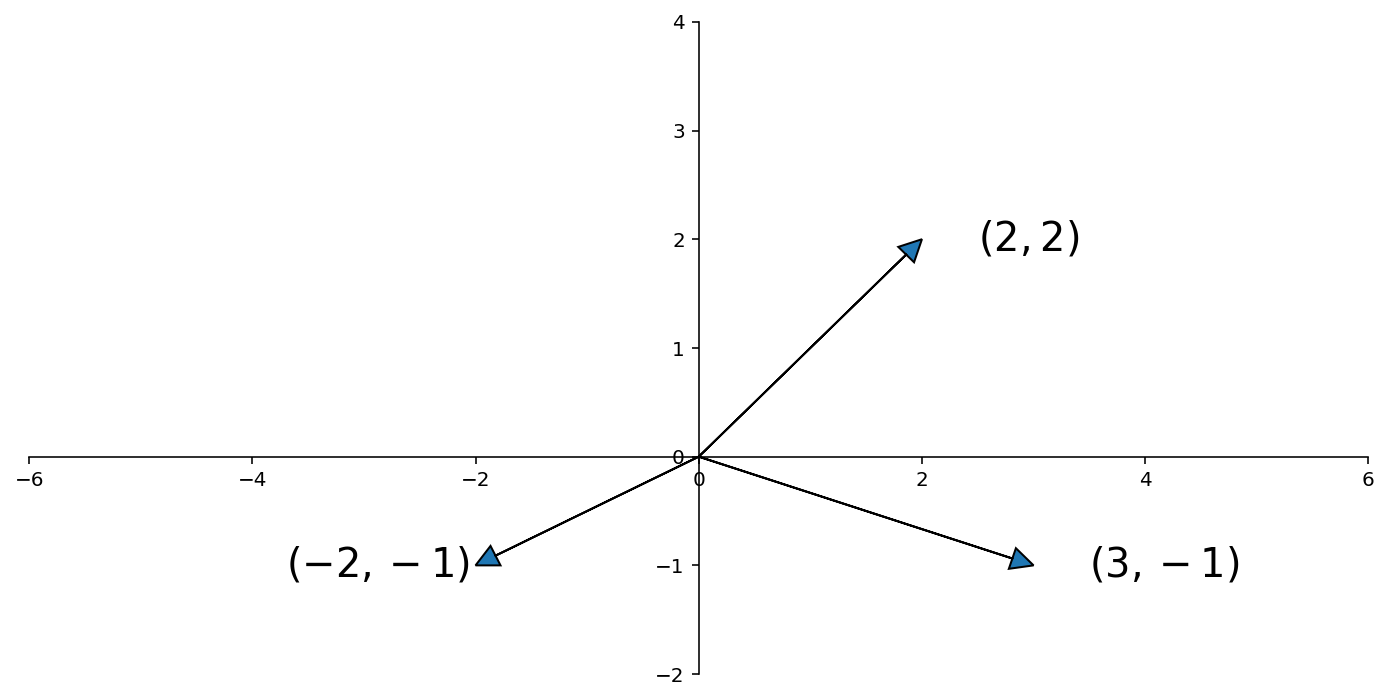

In [4]:
ax = ut.plotSetup(size=(12,6))
ut.centerAxes(ax)
ax.arrow(0, 0, -2, -1, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.arrow(0, 0, 2, 2, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.arrow(0, 0, 3, -1, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.plot(0, -2, '')
ax.plot(-4, 0, '')
ax.plot(0, 2, '')
ax.plot(4 ,0, '')
ax.text(3.5, -1.1, '$(3,-1)$', size=20)
ax.text(2.5, 1.9, '$(2,2)$', size=20)
ax.text(-3.7, -1.1, '$(-2,-1)$', size=20);

## Vector Addition, Geometrically

A geometric interpretation of vector sum is as a parallelogram.  If ${\bf u}$ and ${\bf v}$ in $\mathbb{R}^2$ are represented as points in the plane, then ${\bf u} + {\bf v}$ corresponds to the fourth vertex of the parallelogram whose other vertices are ${\bf u}, 0,$ and ${\bf v}$.

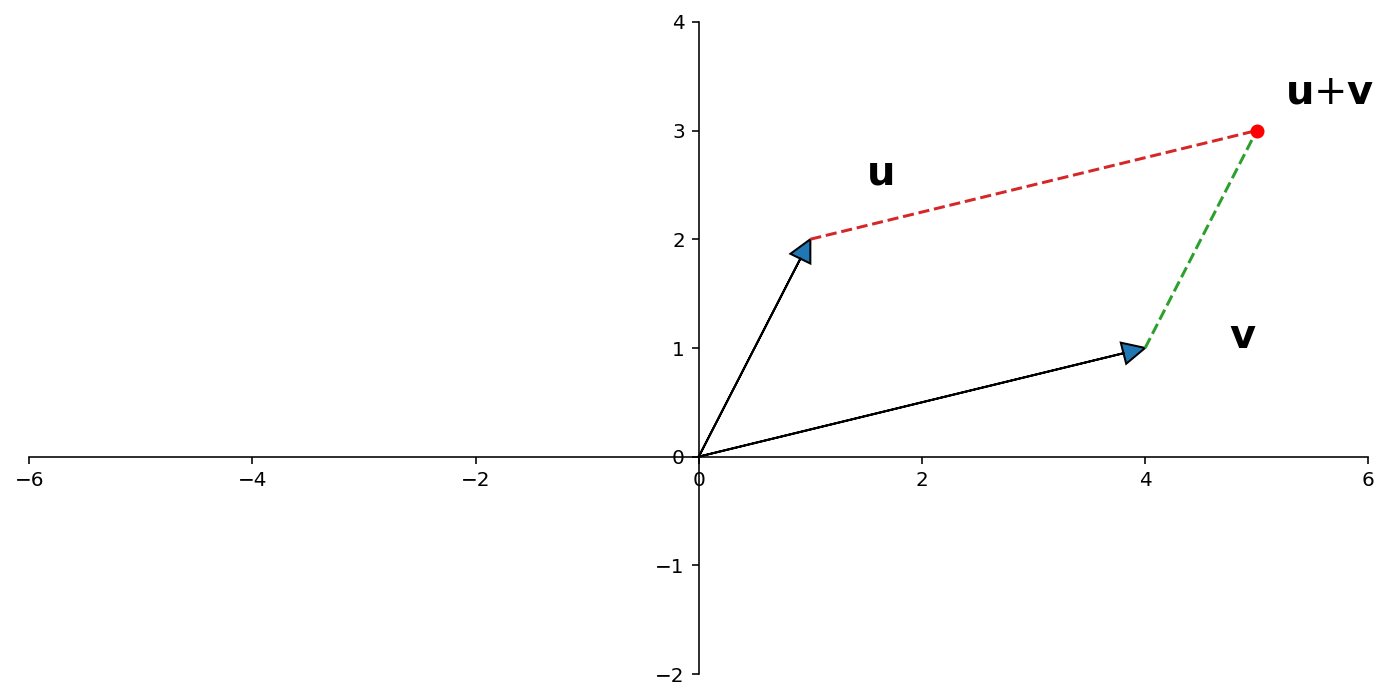

In [5]:
ax = ut.plotSetup(size=(12,6))
ut.centerAxes(ax)
ax.arrow(0, 0, 1, 2, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.arrow(0, 0, 4, 1, head_width=0.2, head_length=0.2, length_includes_head = True)
ax.plot([4,5],[1,3],'--')
ax.plot([1,5],[2,3],'--')
ax.text(5.25,3.25,r'${\bf u}$+${\bf v}$',size=20)
ax.text(1.5,2.5,r'${\bf u}$',size=20)
ax.text(4.75,1,r'${\bf v}$',size=20)
ut.plotPoint(ax,5,3)
ax.plot(0,0,'');

## Matrix Multiplication

Using addition and multiplication by scalars, we can create equations using vectors.

Then we make the follow equivalence:
    
A vector equation
$$ x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n} = {\bf b} $$

Can also be written as

$$ A\mathbf{x} = \mathbf{b}$$

where

$$ A = [{\bf a_1} \; {\bf a_2} \; ... \; {\bf a_n}] $$

and 

$$\mathbf{x} = \left[\begin{array}{c}x_1\\x_2\\\vdots\\x_n\end{array}\right]$$

We then extend this to define matrix multiplication as

__Definition.__  If $A$ is an $m \times n$ matrix and $B$ is $n \times p$ matrix with columns ${\bf b_1},\dots,{\bf b_p},$ then the product $AB$ is defined as the $m \times p$ matrix whose columns are $A{\bf b_1}, \dots, A{\bf b_p}.$  That is,

$$ AB = A[{\bf b_1} \; \dots \; {\bf b_p}] = [A{\bf b_1} \; \dots \; A{\bf b_p}]. $$

Continuing on, we can define the __inverse__ of a matrix.
    
We have to recognize that this inverse does not exist for all matrices.

* It only exists for square matrices
* And not even for all square matrices -- only those that are "invertible."

A matrix that is not invertible is called a __singular__ matrix.

__Definition.__ A matrix $A$ is called __invertible__ if there exists a matrix $C$ such that

$$ AC = I \mbox{  and  } CA = I. $$

In that case $C$ is called the _inverse_ of $A$.   Clearly, $C$ must also be square and the same size as $A$.

The inverse of $A$ is denoted $A^{-1}.$

## Inner Product

Now we introduce the __inner product__, also called the __dot product.__

The inner product is defined for two vectors, in which one is transposed to be a single row.  It returns a single number.   

For example, the expression

$$[3\;5\;1] \left[\begin{array}{c}2\\-1\\4\end{array}\right]$$

is the same as

$$(3\cdot 2) + (5\cdot -1) + (1 \cdot 4)$$

which is the sum of the products of the corresponding entries, and yields the scalar value 5.  

This is the inner product of the two vectors.

Thus the inner product of $\mathbf{x}$ and $\mathbf{y}$ is $\mathbf{x}^T \mathbf{y} = \mathbf{y}^T \mathbf{x}$.

The general definition of the inner product is:

$$[x_1\;x_2\;\dots\;x_n] \left[\begin{array}{c}y_1\\y_2\\\vdots\\y_n\end{array}\right] = \sum_{i=1}^n x_i y_i$$


## Vector Norm

If $\mathbf{v}$ is in $\mathbb{R}^n$, with entries $v_1,\dots,v_n,$ then the square root of $\mathbf{v}^T\mathbf{v}$ is defined because $\mathbf{v}^T\mathbf{v}$ is nonnegative.

__Definition.__ The __$\ell_2$ norm__ of $\mathbf{v}$ is the nonnegative scalar $\Vert\mathbf{v}\Vert_2$ defined by

$$\Vert\mathbf{v}\Vert_2 = \sqrt{\mathbf{v}^T\mathbf{v}} = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = \sqrt{\sum_{i=1}^n{v_i}^2}.$$

If we leave the $_2$ subscript off, it is implied.

The ($\ell_2)$ norm of $\mathbf{v}$ is its __length__ in the usual sense.

This follows directly from the Pythagorean theorem:

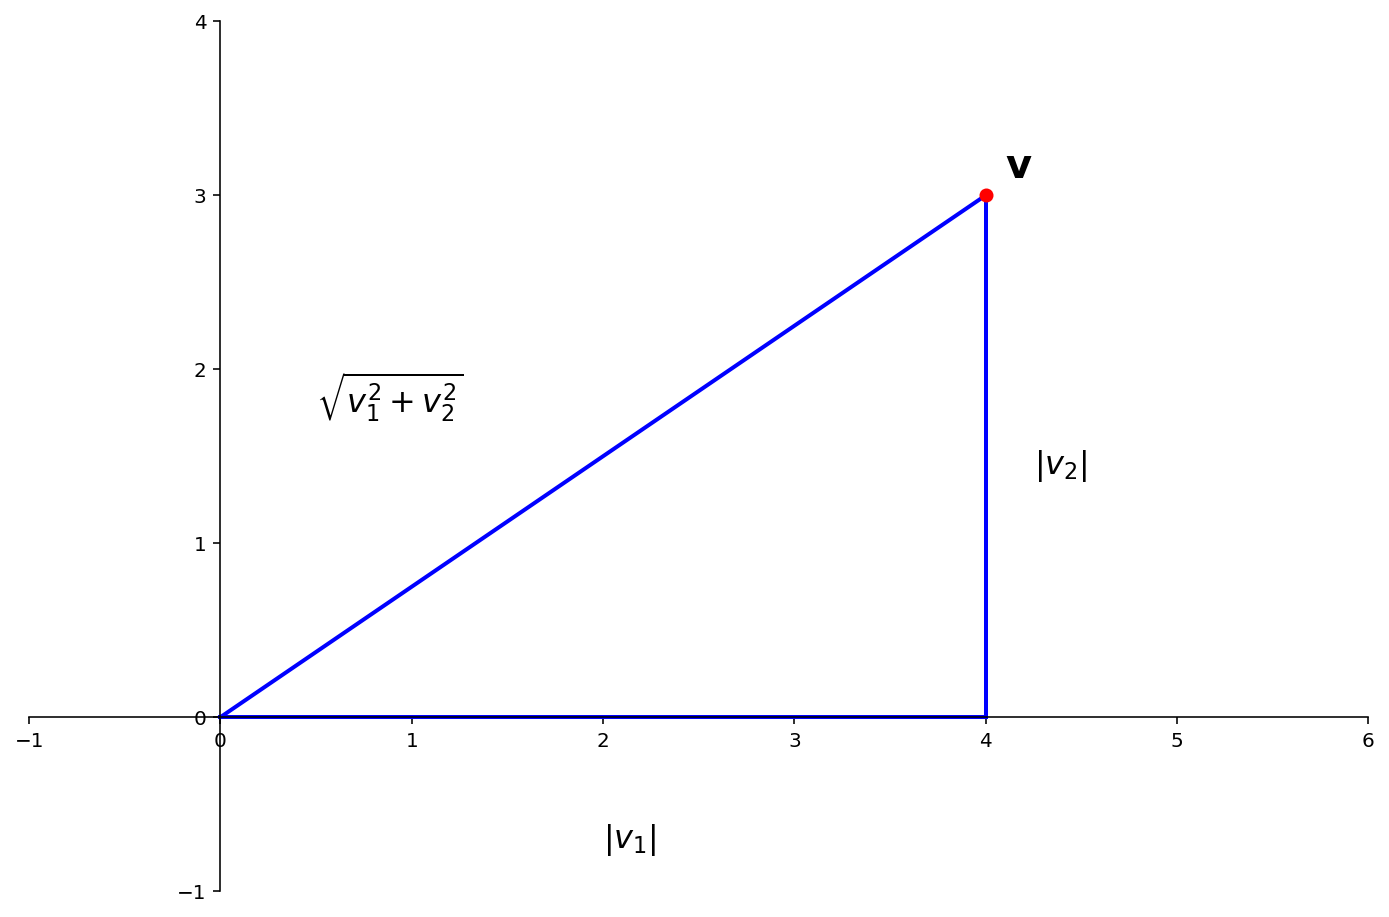

In [6]:
ax = ut.plotSetup(-1,6,-1,4,(12,8))
ut.centerAxes(ax)
pt = [4., 3.]
plt.plot([0,pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([pt[0],pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([0,pt[0]],[0,0],'b-',lw=2)
ut.plotVec(ax,pt)
ax.text(2,-0.75,r'$|v_1|$',size=16)
ax.text(4.25,1.4,r'$|v_2|$',size=16)
ax.text(0.5,1.75,r'$\sqrt{v_1^2+v_2^2}$',size=16)
ax.text(pt[0]+0.1,pt[1]+0.1,r'$\mathbf{v}$',size=20);

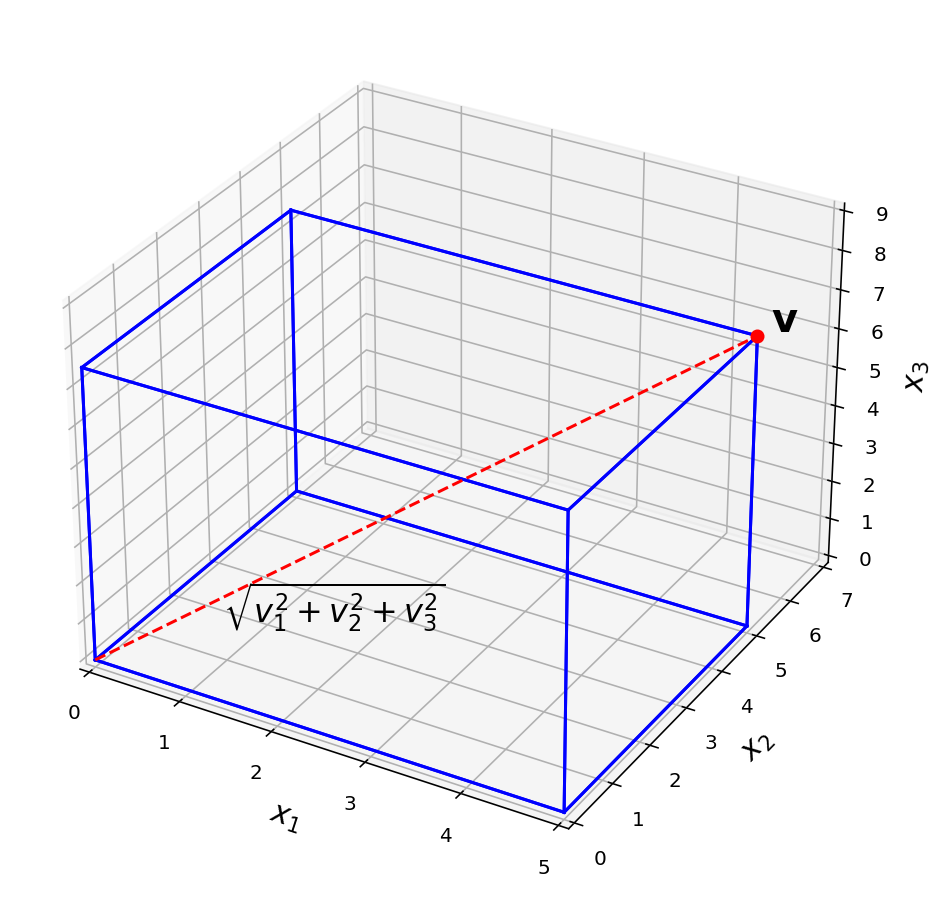

In [7]:
ax = ut.plotSetup3d(0,5,0,7,0,9,(12,8))
f = 1.25
v = [4*f,4*f,6*f]
ut.plotCube(ax,v)
ax.text(v[0]+.1,v[1]+.1,v[2]+.1,r'$\bf v$',size=20)
ax.plot([0,v[0]],[0,v[1]],'r--',zs=[0,v[2]])
ax.plot([v[0]],[v[1]],'ro',zs=[v[2]])
ax.text(0.5,2,-0.5,r'$\sqrt{v_1^2+v_2^2+v_3^2}$',size=16);

A vector of length 1 is called a __unit vector__.  

If we divide a nonzero vector $\mathbf{v}$ by its length -- that is, multiply by $1/\Vert\mathbf{v}\Vert$ -- we obtain a unit vector $\mathbf{u}$.

We say that we have _normalized_ $\mathbf{v}$, and that $\mathbf{u}$ is _in the same direction_ as $\mathbf{v}.$

## Distance in $\mathbb{R}^n$

It's very useful to be able to talk about the __distance__ between two points (or vectors) in $\mathbb{R}^n$.

__Definition.__  For $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^n,$ the __distance between $\mathbf{u}$ and $\mathbf{v}$,__ written as $\mbox{dist}(\mathbf{u},\mathbf{v}),$ is the length of the vector $\mathbf{u}-\mathbf{v}$.  That is,

$$\mbox{dist}(\mathbf{u},\mathbf{v}) = \Vert\mathbf{u}-\mathbf{v}\Vert.$$

This definition agrees with the usual formulas for the Euclidean distance between two points.  The usual formula is

$$\mbox{dist}(\mathbf{u},\mathbf{v}) = \sqrt{(v_1-u_1)^2 + (v_2-u_2)^2 + \dots + (v_n-u_n)^2}.$$

Which you can see is equal to 

$$\Vert\mathbf{u}-\mathbf{v}\Vert = \sqrt{(\mathbf{u}-\mathbf{v})^T(\mathbf{u}-\mathbf{v})} = \sqrt{\left[\begin{array}{cccc}u_1-v_1&u_2-v_2&\dots&u_n-v_n\end{array}\right]\left[\begin{array}{c}u_1-v_1\\u_2-v_2\\\vdots\\u_n-v_n\end{array}\right]}$$

There is another important reformulation of distance.    Consider the squared distance:

$$\Vert\mathbf{u}-\mathbf{v}\Vert^2 = (\mathbf{u}-\mathbf{v})^T(\mathbf{u}-\mathbf{v})$$

Expanding this out, we get:

$$\Vert\mathbf{u}-\mathbf{v}\Vert^2 = \mathbf{u}^T\mathbf{u} + \mathbf{v}^T\mathbf{v} - 2\mathbf{u}^T\mathbf{v}.$$

$$= \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}.$$

This is an important formula because it relates __distance__ between two points to their __lengths__ and __inner product.__

## Orthogonal Vectors

Now we turn to another familiar notion from 2D geometry, which we'll generalize to $\mathbb{R}^n$: the notion of being __perpendicular.__  

We will generally use the fancier term __orthogonal__ -- which means the same thing as perpendicular.

We will say that two vectors are orthogonal if they form a right angle at the origin.

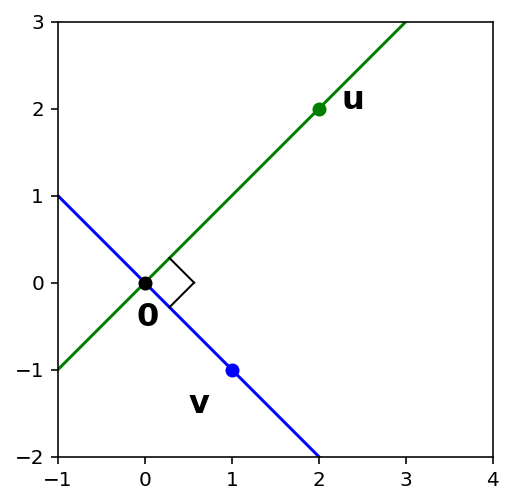

In [8]:
ax = ut.plotSetup(-1,4,-2,3)
ax.set_aspect('equal')
# ut.noAxes(ax)
u = np.array([2, 2])
v = np.array([1, -1])
# v
ut.plotLinEqn(u[0], u[1], 0, '-', 'b')
ut.plotLinEqn(v[0], v[1], 0, '-', 'g')
ax.text(v[0]-0.5,v[1]-0.5,r'$\bf v$',size=16)
ut.plotVec(ax,v,'b')
# u
ut.plotVec(ax,u,'g')
ax.text(u[0]+0.25,u[1],r'$\bf u$',size=16)
# origin
ut.plotVec(ax, np.array([0, 0]), 'k')
ax.text(0-0.1, 0-0.5, r'$\bf 0$', size=16);
# symbol
perpline1, perpline2 = ut.perp_sym(np.array([0, 0]), u, v, 0.4)
plt.plot(perpline1[0], perpline1[1], 'k', lw = 1)
plt.plot(perpline2[0], perpline2[1], 'k', lw = 1);

Draw the line connecting $\mathbf{u}$ and $\mathbf{v}$.

Then $\mathbf{u}$ and $\mathbf{v}$ are orthogonal if and only if they make a right triangle with the origin.

So $\mathbf{u}$ and $\mathbf{v}$ are orthogonal if and only if the Pythagorean Theorem is satisified for this triangle.

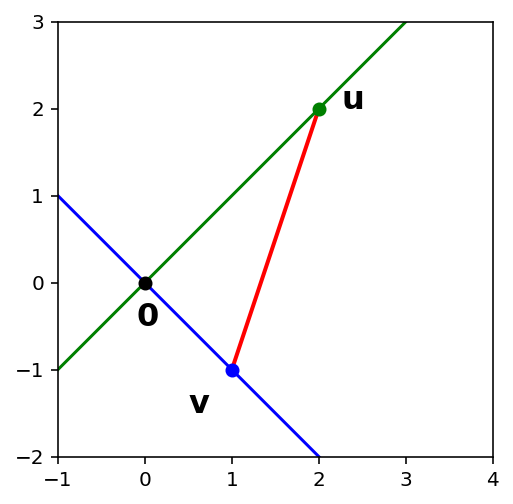

In [9]:
ax = ut.plotSetup(-1,4,-2,3)
ax.set_aspect('equal')
# ut.noAxes(ax)
u = np.array([2, 2])
v = np.array([1, -1])
plt.plot([v[0],u[0]],[v[1],u[1]],'r-',lw=2)
# v
ut.plotLinEqn(u[0], u[1], 0, '-', 'b')
ut.plotLinEqn(v[0], v[1], 0, '-', 'g')
ax.text(v[0]-0.5,v[1]-0.5,r'$\bf v$',size=16)
ut.plotVec(ax,v,'b')
# u
ut.plotVec(ax,u,'g')
ax.text(u[0]+0.25,u[1],r'$\bf u$',size=16)
# origin
ut.plotVec(ax, np.array([0, 0]), 'k')
ax.text(0-0.1, 0-0.5, r'$\bf 0$', size=16);

What is the length of the red side of the triangle?

According to the definition of length based on norm, it is $\Vert \mathbf{u} - \mathbf{v} \Vert$.

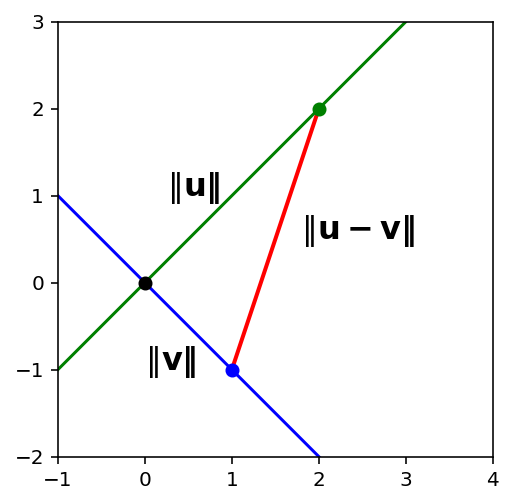

In [10]:
ax = ut.plotSetup(-1,4,-2,3)
ax.set_aspect('equal')
# ut.noAxes(ax)
u = np.array([2, 2])
v = np.array([1, -1])
plt.plot([v[0],u[0]],[v[1],u[1]],'r-',lw=2)
# v
ut.plotLinEqn(u[0], u[1], 0, '-', 'b')
ut.plotLinEqn(v[0], v[1], 0, '-', 'g')
ax.text(v[0]/2-0.5,v[1]/2-0.5,r'$\Vert\bf v\Vert$',size=16)
ut.plotVec(ax,v,'b')
# u
ut.plotVec(ax,u,'g')
ax.text(u[0]/2-.75,u[1]/2,r'$\Vert\bf u\Vert$',size=16)
# origin
ut.plotVec(ax, np.array([0, 0]), 'k')
#
mm = (u + v) / 2
ax.text(mm[0]+0.3,mm[1],r'$\Vert\bf u - v\Vert$',size=16);

So the blue and green lines are perpendicular if and only if:

$$ \Vert \mathbf{u} - \mathbf{v} \Vert^2 = \Vert \mathbf{u} \Vert^2 + \Vert \mathbf{v} \Vert^2$$

First let's simplify the expression for squared distance from $\mathbf{u}$ to $\mathbf{v}$:

$$ \Vert\mathbf{u}-\mathbf{v}\Vert^2 = (\mathbf{u}-\mathbf{v})^T(\mathbf{u}-\mathbf{v}) $$

$$ = \mathbf{u}^T\mathbf{u} - \mathbf{u}^T\mathbf{v} - \mathbf{v}^T\mathbf{u} + \mathbf{v}^T\mathbf{v}$$

$$ = \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}$$

Now, let's go back to the Pythagorean Theorem.  

$  \mathbf{u}$ and $ \mathbf{v} $ are perpendicular if and only if:

$$ \Vert \mathbf{u} - \mathbf{v} \Vert^2 = \Vert \mathbf{u} \Vert^2 + \Vert \mathbf{v} \Vert^2$$

But we've seen that this means:

$$ \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}= \Vert \mathbf{u} \Vert^2 + \Vert \mathbf{v} \Vert^2$$

So now we can define perpendicularity in $\mathbb{R}^n$:

__Definition.__  Two vectors $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^n$ are __orthogonal__ to each other if $\mathbf{u}^T\mathbf{v} = 0.$

This gives us a very simple rule for determining whether two vectors are orthogonal: if and only if their inner product is zero.

## The Angle Between Two Vectors

There is a further connection between the inner product of two vectors and the __angle__ between them.

This connection is very useful (eg, in visualizing data mining operations).

We start from the __law of cosines:__

$$ c^2 = a^2 + b^2 - 2ab\cos\theta$$

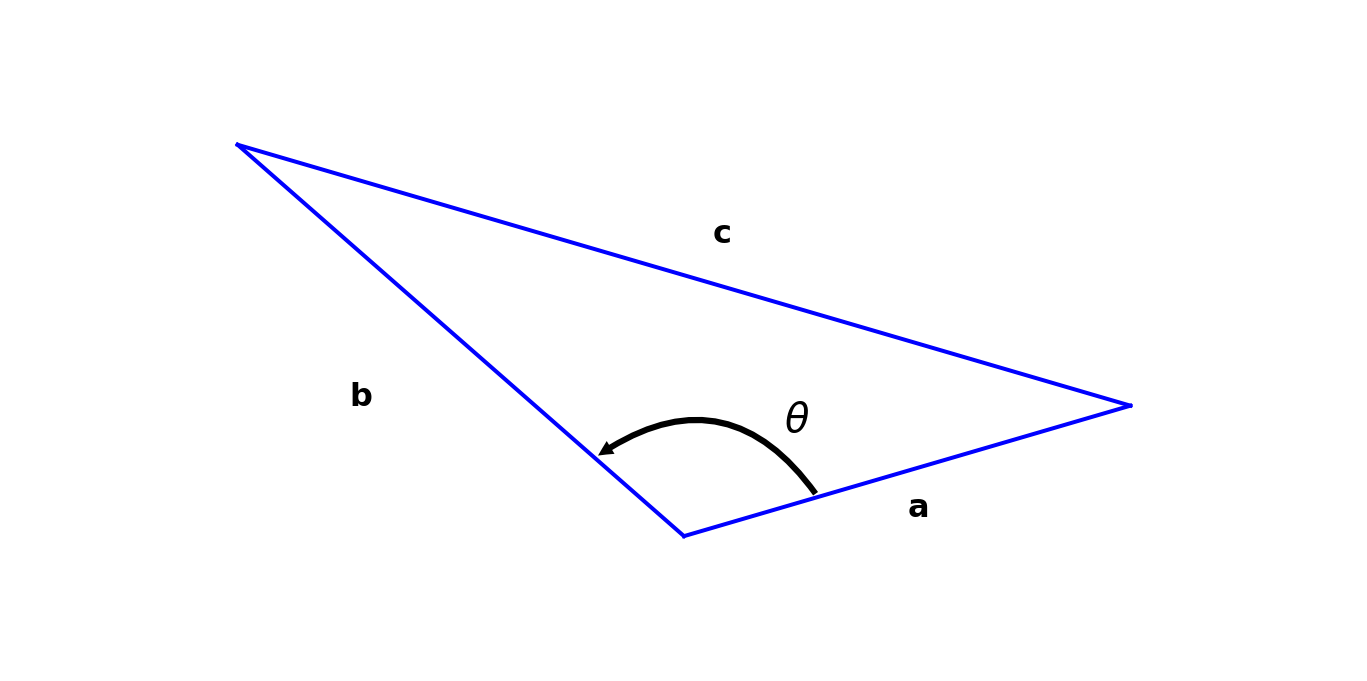

In [11]:
ax = ut.plotSetup(-6,6,-1,4,(12,6))
u = np.array([4.,1])
v = np.array([-4.,3])
pt = u + v
plt.plot([u[0],v[0]],[u[1],v[1]],'b-',lw=2)
plt.plot([0,u[0]],[0,u[1]],'b-',lw=2)
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
m = (u-v)/2.0
mm = v + m
ax.text(mm[0]+0.25,mm[1]+0.25,r'${\bf c}$',size=16)
ax.text(2,0.15,r'${\bf a}$',size=16)
ax.text(-3,1,r'${\bf b}$',size=16)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'},
                )
ax.text(0.9,0.8,r'$\theta$',size=20)
plt.axis('off');

Now let's interpret this law in terms of vectors $\mathbf{u}$ and $\mathbf{v}$.

Once again, it is the angle that these vectors make at the origin that we are concerned with:

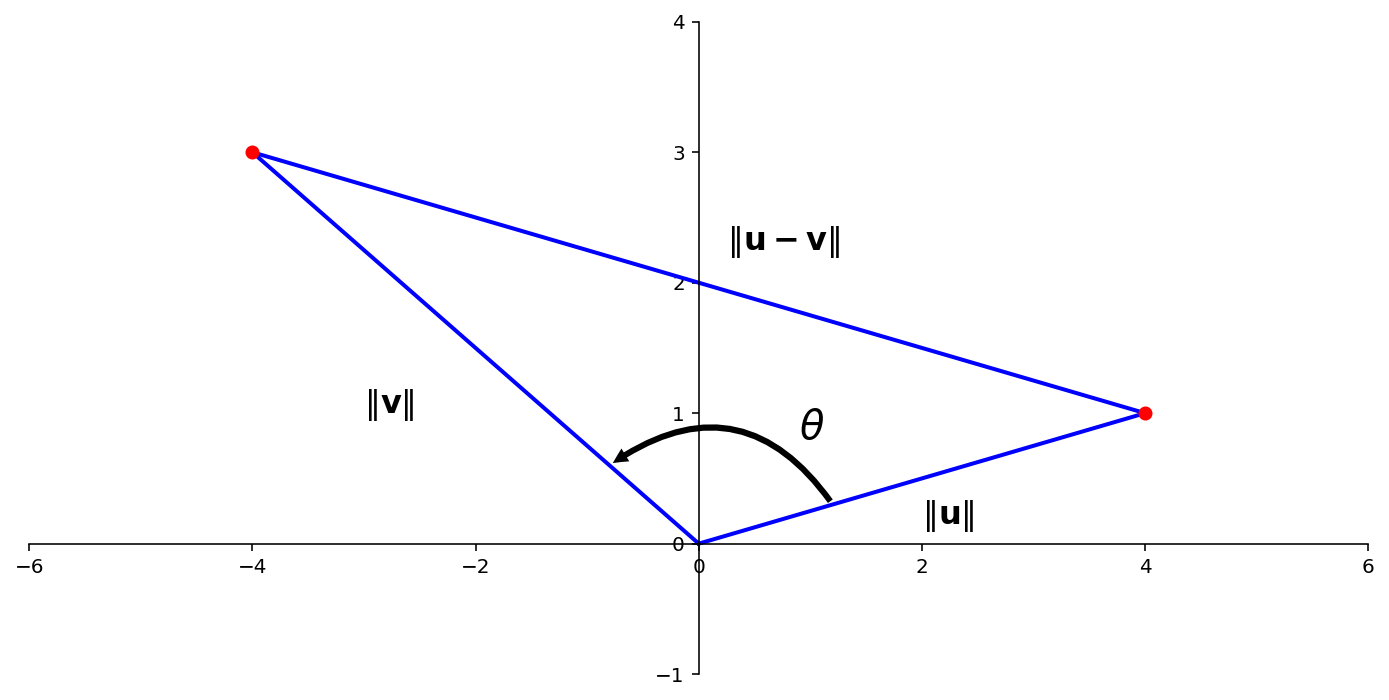

In [12]:
ax = ut.plotSetup(-6,6,-1,4,(12,6))
ut.centerAxes(ax)
u = np.array([4.,1])
v = np.array([-4.,3])
pt = u + v
plt.plot([u[0],v[0]],[u[1],v[1]],'b-',lw=2)
plt.plot([0,u[0]],[0,u[1]],'b-',lw=2)
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
ut.plotVec(ax,u)
ut.plotVec(ax,v)
m = (u-v)/2.0
mm = v + m
ax.text(mm[0]+0.25,mm[1]+0.25,r'$\Vert{\bf u-v}\Vert$',size=16)
ax.text(2,0.15,r'$\Vert{\bf u}\Vert$',size=16)
ax.text(-3,1,r'$\Vert{\bf v}\Vert$',size=16)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'},
                )
ax.text(0.9,0.8,r'$\theta$',size=20);

Applying the law of cosines we get:
    
$$\Vert\mathbf{u}-\mathbf{v}\Vert^2 = \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

And by definition:

$$ \Vert\mathbf{u}-\mathbf{v}\Vert^2 = \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}$$

So 

$$ \mathbf{u}^T\mathbf{v} = \Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

This is a __very__ important connection between the notion of inner product and trigonometry.

One implication in particular concerns __unit vectors.__

$$ \mathbf{u}^T\mathbf{v} = \Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

So 

$$ \frac{\mathbf{u}^T\mathbf{v}}{\Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert} = \cos\theta$$

$$ \frac{\mathbf{u}^T}{\Vert\mathbf{u}\Vert}\frac{\mathbf{v}}{\Vert\mathbf{v}\Vert} = \cos\theta$$

So we have the very simple rule, that for two unit vectors, their inner product is the cosine of the angle between them!

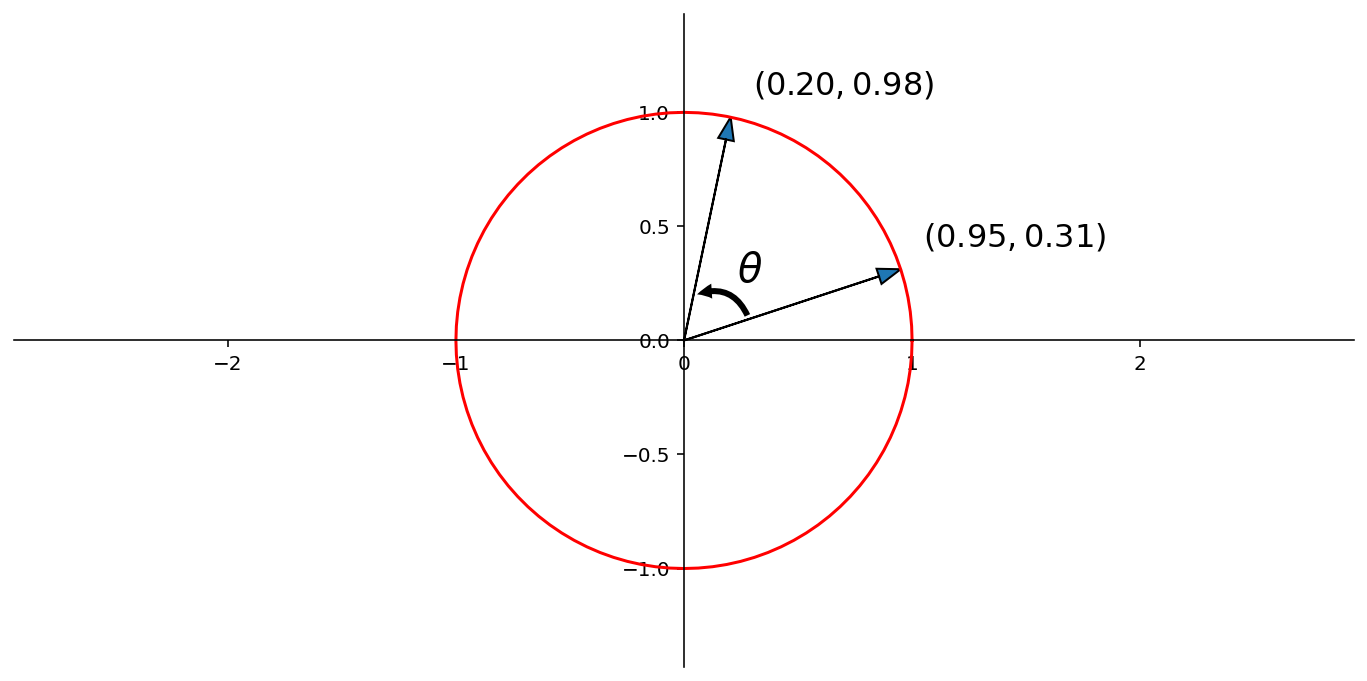

In [13]:
u = np.array([0.95, np.sin(np.arccos(0.95))])
theta = (np.pi/3)+np.arccos(0.95)
v = np.array([np.cos(theta), np.sin(theta)])
ax = ut.plotSetup(-1.3,1.3,-1.3,1.3,(12,6))
ut.centerAxes(ax)
plt.axis('equal')
angles = 2.0*np.pi * np.array(range(101))/100.0
plt.plot(np.cos(angles),np.sin(angles),'r-')
ax.arrow(0,0,u[0],u[1],head_width=0.07, head_length=0.1,length_includes_head = True)
ax.arrow(0,0,v[0],v[1],head_width=0.07, head_length=0.1,length_includes_head = True)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'})
mid = 0.4*(u+v)/2.0
ax.text(mid[0],mid[1],r'$\theta$',size=20)
ax.text(u[0]+.1,u[1]+.1,r'$(%0.2f,%0.2f)$'% (u[0],u[1]),size=16)
ax.text(v[0]+.1,v[1]+.1,r'$(%0.2f,%0.2f)$'% (v[0],v[1]),size=16);

Here $\mathbf{u} = \left[\begin{array}{c}0.95\\0.31\end{array}\right],$ and $\mathbf{v} = \left[\begin{array}{c}0.20\\0.98\end{array}\right].$

So $\mathbf{u}^T\mathbf{v} = (0.95\cdot 0.20) + (0.31 \cdot 0.98) = 0.5$

So $\cos\theta = 0.5.$

So $\theta = 60$ degrees.

## Least Squares

In many cases we have a linear system 

$$ A \mathbf{x} = \mathbf{b}$$ 

that has no solution -- perhaps due to noise or measurement error.

In such as case, we generally look for an $\mathbf{x}$ such that $A\mathbf{x}$ makes a good __approximation__ to $\mathbf{b}.$

We can think of the quality of the approximation of $A\mathbf{x}$ to $\mathbf{b}$ as the distance from $A\mathbf{x}$ to $\mathbf{b},$ which is

$$\Vert A\mathbf{x} - \mathbf{b}\Vert.$$

The __general least-squares problem__ is to find an $\mathbf{x}$ that makes $\Vert A\mathbf{x}-\mathbf{b}\Vert$ as small as possible.

Just to make this explicit: say that we denote $A\mathbf{x}$ by $\mathbf{y}$.    Then

$$\Vert A\mathbf{x}-\mathbf{b}\Vert^2 = \sum_i (y_i-b_i)^2$$

Where we interpret $y_i$ as the _estimated value_ and $b_i$ as the _measured value._

So this expression is the __sum of squared error.__   This is the most common measure of error used in statistics.   Note that we could also say we are minimizing the $\ell_2$ norm of the error.

This is a key principle!  

__Minimizing the length of $A\mathbf{x} - \mathbf{b}$ is the same as minimizing the sum of squared error.__

An equivalent (and more common) way to express this is:

$$\hat{\mathbf{x}} = \arg\min_\mathbf{x} \Vert A\mathbf{x} - \mathbf{b}\Vert.$$

which emphasizes that this is a minimization problem, also called an _optimization_ problem.

We can find $\hat{\mathbf{x}}$ using either 

* geometric arguments (based on projecting $\mathbf{b}$ on the column space of $A$), or
* by calculus (taking the derivative of the rhs expression above and setting it equal to zero).

Either way, we get the result that:

$\hat{\mathbf{x}}$ is the solution of:
    
$$A^TA\mathbf{x} = A^T\mathbf{b}$$

And we can then prove that these equations always have at least one solution. 

When $A^TA$ is invertible, we call the system "overdetermined."  This means that there is just one solution, and so we then solve $A^TA\mathbf{x} = A^T\mathbf{b}$ as

$$\hat{x} = (A^TA)^{-1}A^T\mathbf{b}$$

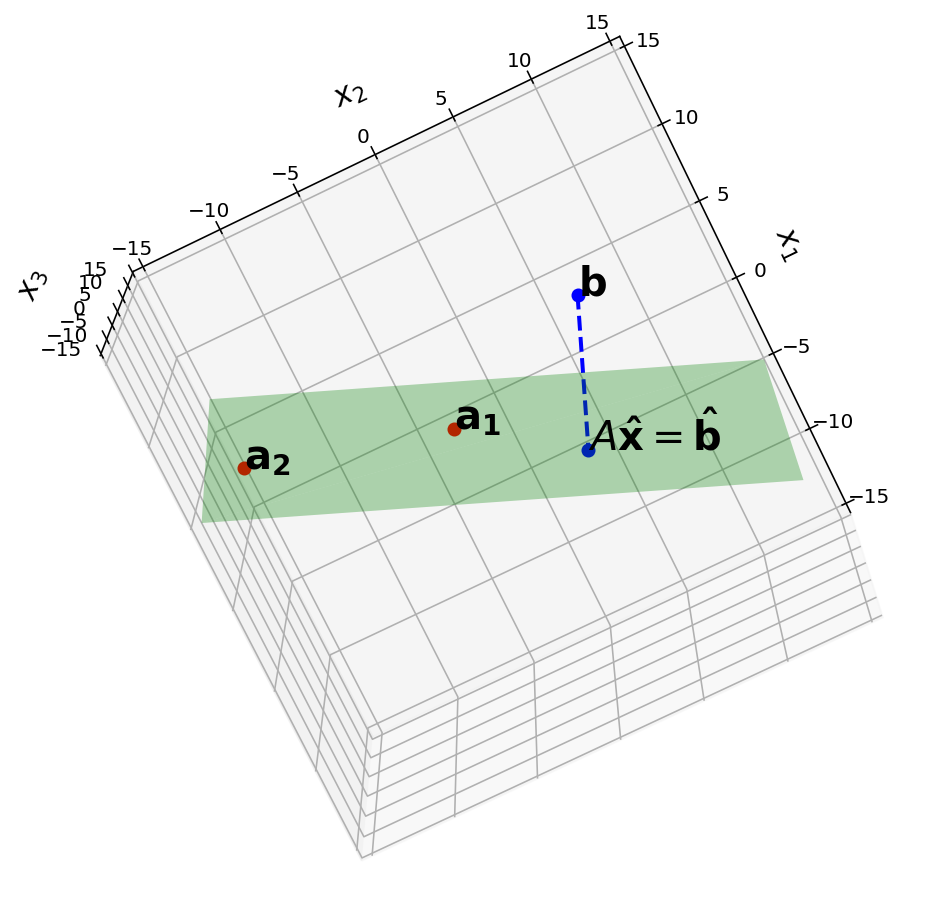

In [14]:
ax = ut.plotSetup3d(-15,15,-15,15,-15,15,(12,8))
a2 = np.array([5.0,-13.0,-3.0])
a1 = np.array([1,-2.0,3])
b = np.array([6.0, 8.0, -5.0])
A = np.array([a1, a2]).T
bhat = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T).dot(b)
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
ax.text(bhat[0],bhat[1],bhat[2],r'$A\mathbf{\hat{x}} = \mathbf{\hat{b}}$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
#ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
ut.plotPoint3d(ax,bhat[0],bhat[1],bhat[2],'b')
ax.plot([b[0],bhat[0]],[b[1],bhat[1]],'b--',zs=[b[2],bhat[2]],lw=2)
#ut.plotPoint3d(ax,0,0,0,'b')
ax.view_init(azim=26.0,elev=-77.0);

## Eigendecomposition

Consider a square matrix $A$.   An __eigenvector__ of $A$ is a special vector which __does not change its direction__ when multiplied by $A$.

__Example.__

Let $A = \left[\begin{array}{rr}3&-2\\1&0\end{array}\right], \mathbf{u} = \left[\begin{array}{r}-1\\1\end{array}\right], \mathbf{v}=\left[\begin{array}{r}2\\1\end{array}\right].$  The images of $\mathbf{u}$ and $\mathbf{v}$ under multiplication by $A$ are shown here:

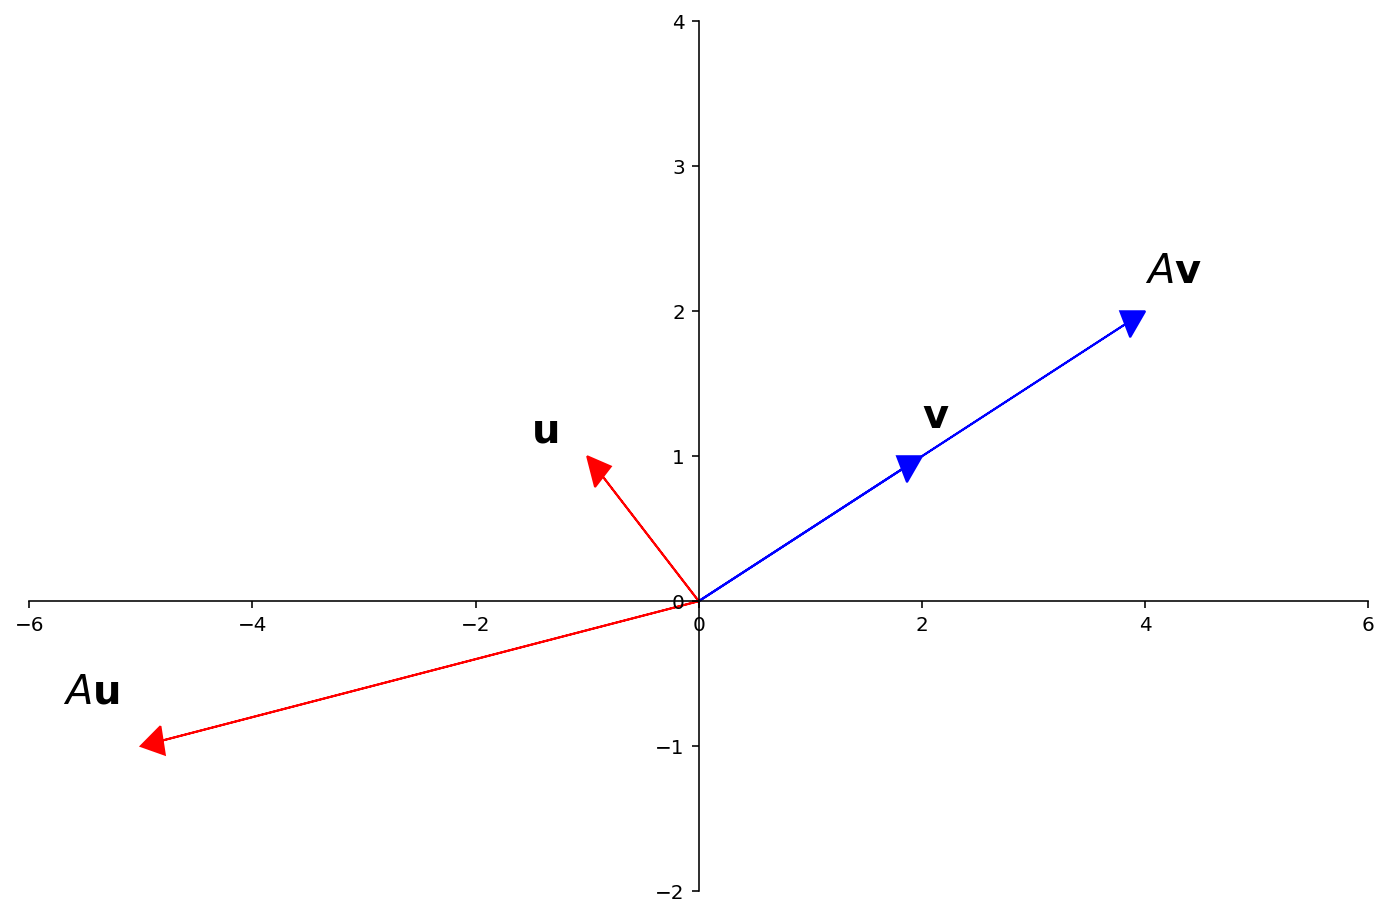

In [15]:
ax = ut.plotSetup(size=(12,8))
ut.centerAxes(ax)
A = np.array([[3,-2],[1,0]])
u = np.array([-1,1])
v = np.array([2,1])
#
ut.plotArrowVec(ax, v, [0,0], color='Blue')
ut.plotArrowVec(ax, A.dot(v), [0,0], color='Blue')
ax.text(v[0],v[1]+0.2,r'${\bf v}$',size=20)
ax.text(A.dot(v)[0],A.dot(v)[1]+0.2,r'$A{\bf v}$',size=20)
#
ut.plotArrowVec(ax, u, [0,0], color='Red')
ut.plotArrowVec(ax, A.dot(u), [0,0], color='Red')
ax.text(u[0]-0.5,u[1]+0.1,r'${\bf u}$',size=20)
ax.text(A.dot(u)[0]-0.7,A.dot(u)[1]+0.3,r'$A{\bf u}$',size=20);

__Definition.__  

An __eigenvector__ of an $n\times n$ matrix $A$ is a nonzero vector $\mathbf{x}$ such that $A\mathbf{x} = \lambda\mathbf{x}$ for some scalar $\lambda.$  

A scalar $\lambda$ is called an __eigenvalue__ of $A$ if there is a nontrivial solution $\mathbf{x}$ of $A\mathbf{x} = \lambda\mathbf{x}.$  

Such an $\mathbf{x}$ is called an _eigenvector corresponding to $\lambda.$_

An $n \times n$ matrix has at most $n$ distinct eigenvectors and at most $n$ distinct eigenvalues.

In some cases, the matrix may be __factorable__ using it eigenvectors and eigenvalues. 

This is called __diagonalization.__

A square matrix $A$ is said to be __diagonalizable__ if it can be expressed as:

$$A = PDP^{-1}$$ 

for some invertible matrix $P$ and some diagonal matrix $D$.

In fact, $A = PDP^{-1},$ with $D$ a diagonal matrix, if and only if the columns of $P$ are $n$ __linearly independent eigenvectors__ of $A.$  

In that case, $D$ holds the corresponding eigenvalues of $A$.

That is, 

$$D = \left[\begin{array}{cccc}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n\end{array}\right]$$

and 

$$ P = [\mathbf{v}_1\;\mathbf{v}_2\;\cdots\;\mathbf{v}_n].$$

A special case occurs when $A$ is __symmetric,__ i.e., $A = A^T.$

In that case, the eigenvectors of $A$ are all mutually __orthogonal.__

That is, any two distinct eigenvectors have inner product zero.

Furthermore, we can scale each eigenvector to have unit norm, in which case we say that the eigenvectors are __orthonormal.__

So, let's put this all together.

* The diagonal of $D$ are the eigenvalues of $A$.
* The columns of $P$ are the eigenvectors of $A$.

For a symmetric matrix $A$:

* distinct columns of $P$ are orthogonal
* each column of $P$ has unit norm

Hence, we find that the diagonal elements of $PP^T$ are 1, and the off-diagonal elements are 0.

Hence $PP^T = I$.

So $P^{-1} = P^T.$

So, in the special case of a symmetric matrix, we can decompose $A$ as:

$$A = PDP^T.$$

This amazing fact is known as the __spectral theorem.__

This decomposition of $A$ is its __spectral decomposition.__

(The eigenvalues of a matrix are also called its __spectrum.__)

These facts will be key to understanding the __Singular Value Decomposition,__ which we will study later on.